# **SME0829 - Aprendizado de Máquina**

### **Comparação de classificadores na base de dados Iris**
---

Amanda Caroline de Oliveira Pires - 12559090

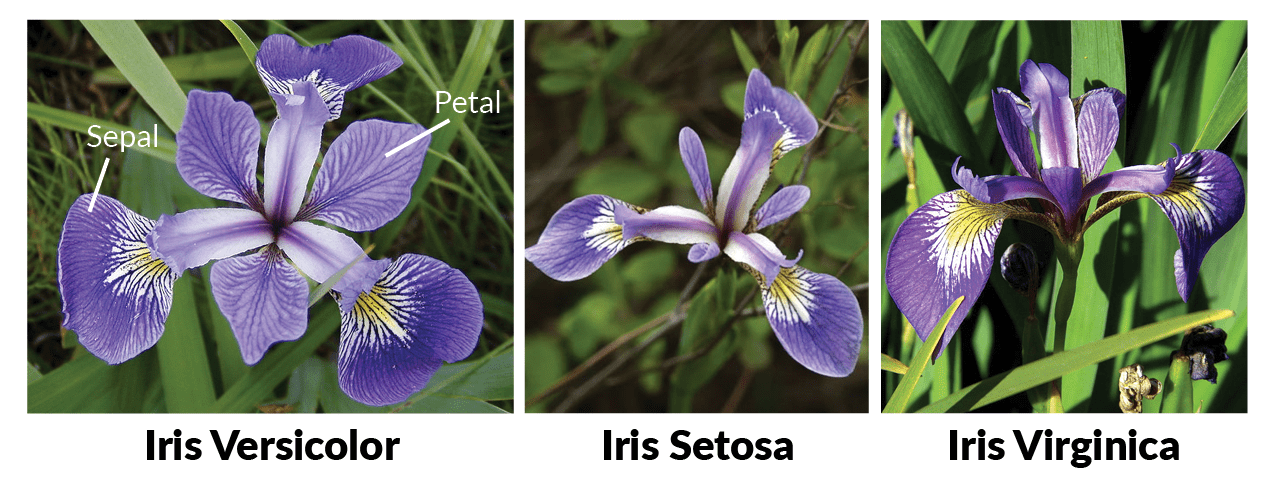


### **Dados**

O conjunto de dados da flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936 O uso de medições múltiplas em problemas taxonômicos como um exemplo de análise discriminante linear. Foram coletadas 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro características foram medidas de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

http://archive.ics.uci.edu/dataset/53/iris

### **Bibliotecas**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as skdata
import statistics
import matplotlib.pyplot as plt
import sklearn as skl

### **Funções**

In [51]:
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from matplotlib import pyplot
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from numpy.lib import index_tricks
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

### **Leitura dos dados**

In [52]:
data = pd.read_csv("/content/iris.csv", header=(0))
print("Número de linhas e colunas:",data.shape)
data

Número de linhas e colunas: (150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica


### **Preparação e limpeza**

In [53]:
# Removendo as linhas duplicadas
data = data.drop_duplicates()

# Removendo "?" e substituindo por "Nan"
data = data.replace('?', np.nan)

# Removendo as linhas com Nan
data = data.dropna()
#data

In [54]:
# Visualizando os dados faltantes

faltantes = data.isnull().sum()
print(faltantes)

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


### **Análise exploratória e Descritiva**

In [55]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.00,149.00,149.00,149.00
mean,5.84,3.06,3.75,1.19
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.30,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


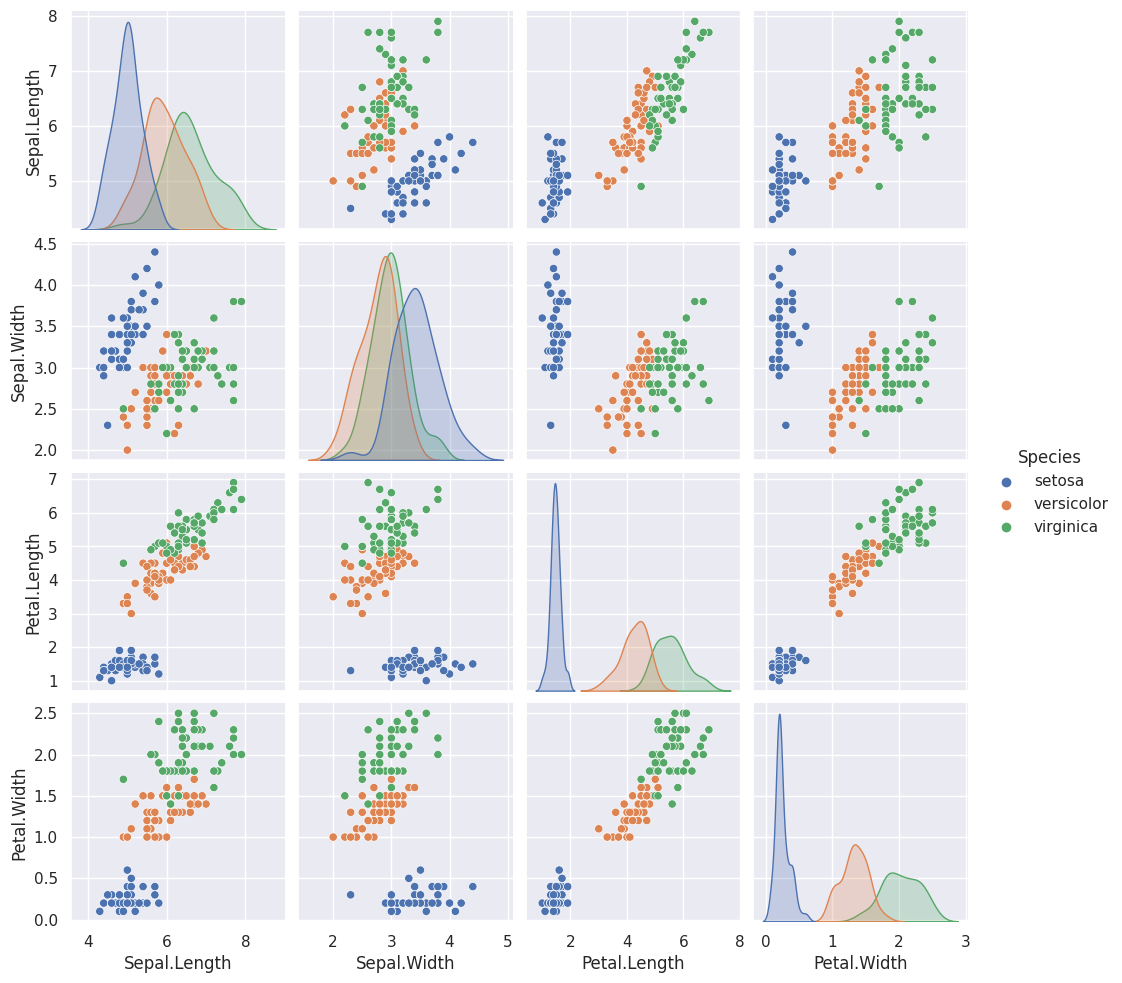

In [56]:
sns.pairplot(data, hue = 'Species')

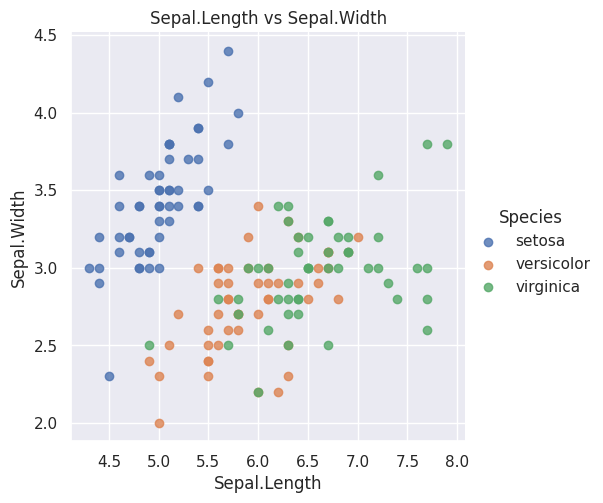

In [57]:
# scatter plot
sns.lmplot(x='Sepal.Length', y='Sepal.Width', data=data,
           fit_reg=False,   # Sem linha de regressão
           hue='Species')   # Cores diferentes por classe

# cria um título para o gráfico
plt.title('Sepal.Length vs Sepal.Width')

# mostra o gráfico
plt.show()

In [58]:
# Considerando o número p de variáveis preditoras (de 2 a 4)

X = data.iloc[:,0:2].values
y = data.iloc[:, 4].values
#X, y

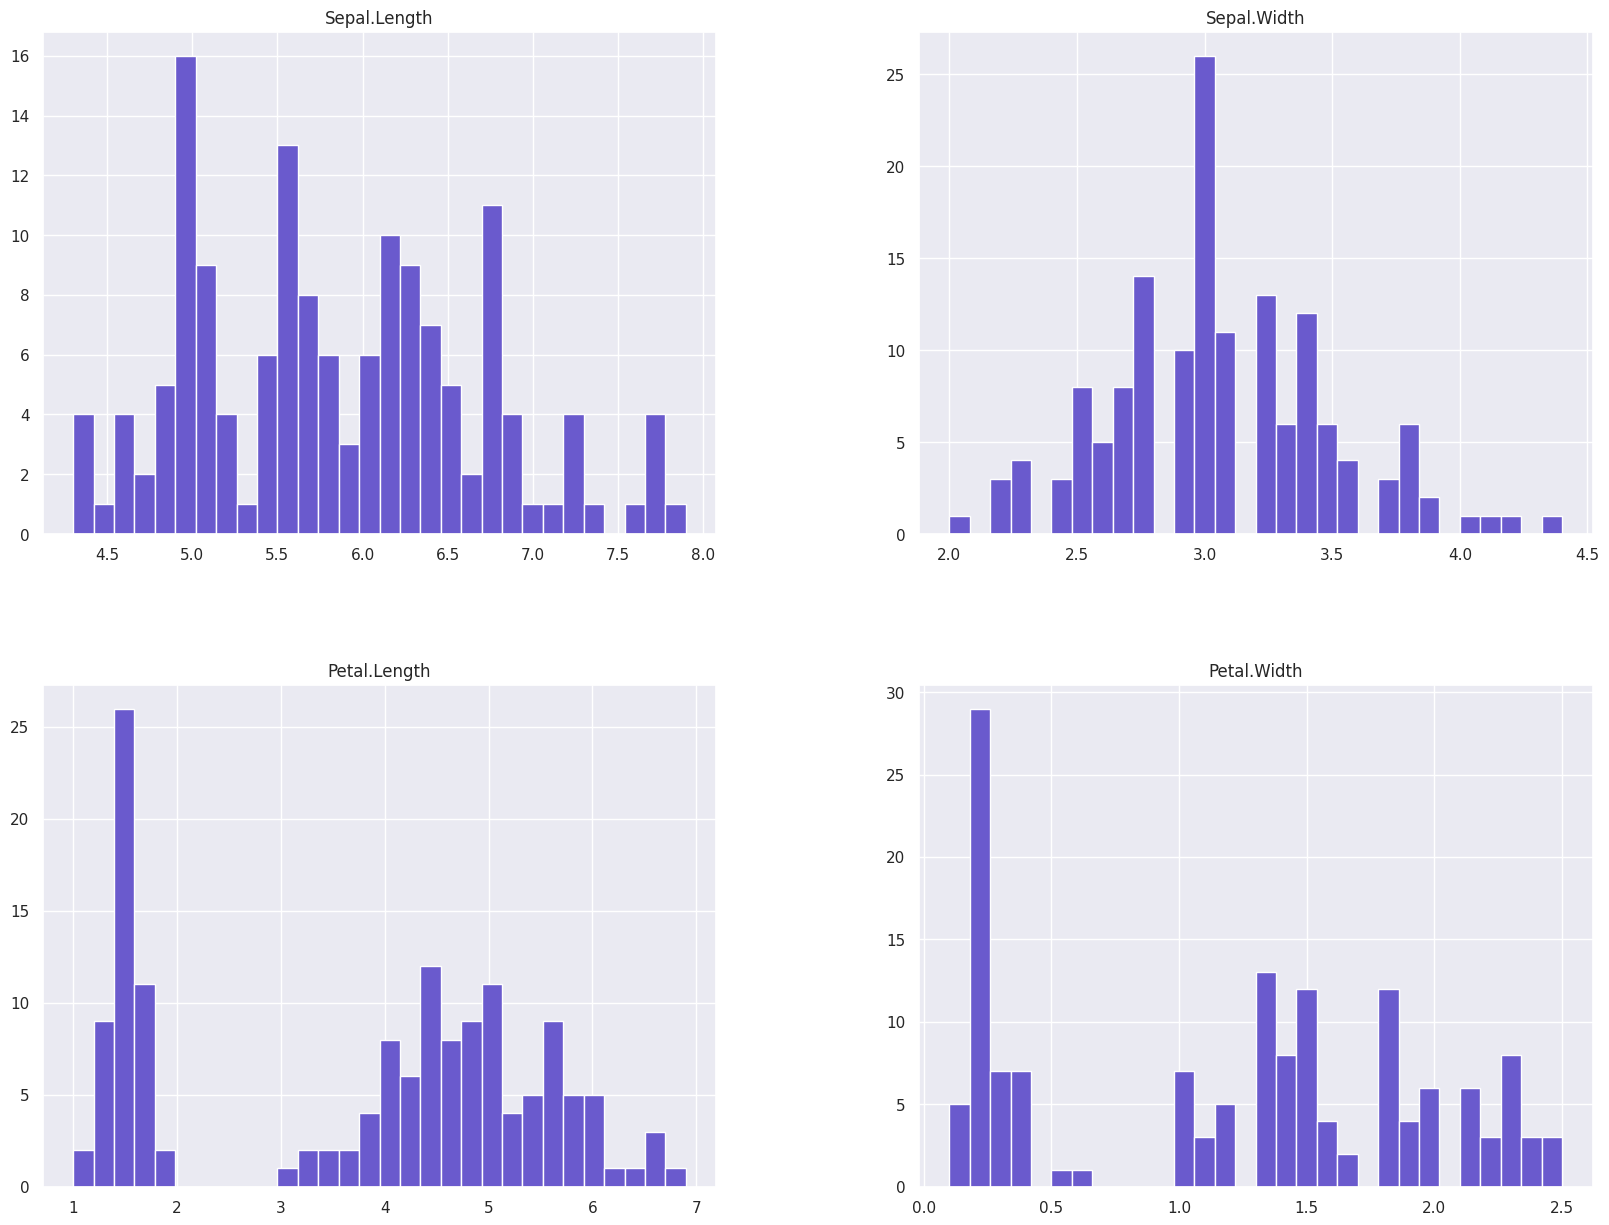

In [59]:
# Visualizando distribuição das espécies

data.hist(bins=30, figsize=(20,15), color = 'SlateBlue')

plt.show()

<Axes: >

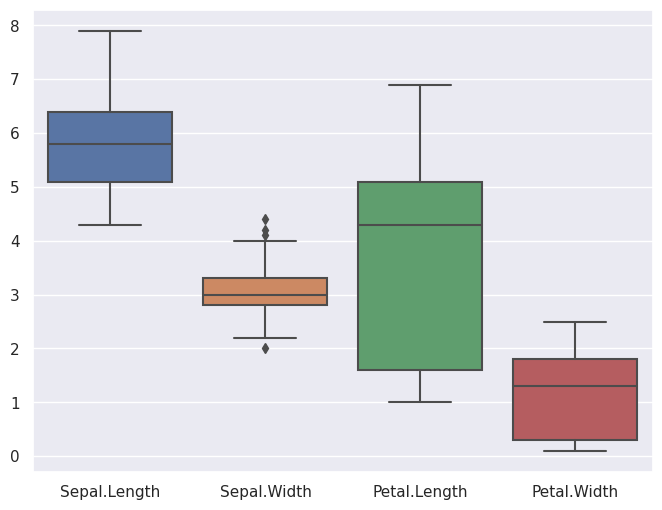

In [60]:
sns.boxplot(data)

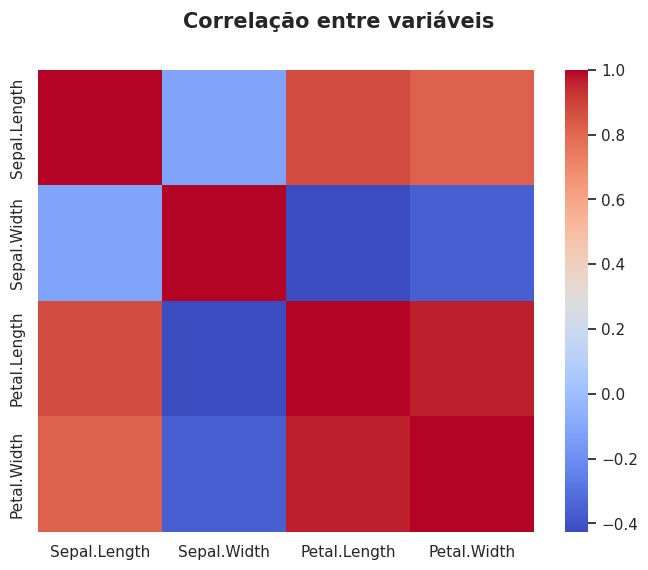

In [61]:
# Verificando a correlação entre as variáveis

corr = data.corr()
sns.set(rc={'figure.figsize':(8,6)})
plt.suptitle('Correlação entre variáveis', fontsize=15, fontweight='bold')
sns.heatmap(corr, cmap='coolwarm')
plt.show()

### **Normalizando os dados**

In [62]:
# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [63]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [1.04912350e-15 1.66906012e-16]
Desvio Padrao: [1. 1.]


In [64]:
# Definindo conjunto de teste e de treino

p = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

### **Decision Tree**

A ideia por trás do algoritmo Árvore de Decisão é estabelecer nós que se relacionam entre si por uma hierarquia. Existe o nó-raiz, que é o mais importante, e os nós-folha, que são os resultados finais. Na ligação entre nós, há regras de "se-então".

In [65]:
# Importando a árvore de decisão
from sklearn import tree

In [66]:
# Criando o classificador e fazendo o fit

clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [67]:
# Verificando o score

clf2.score(X_train,y_train)

0.9615384615384616

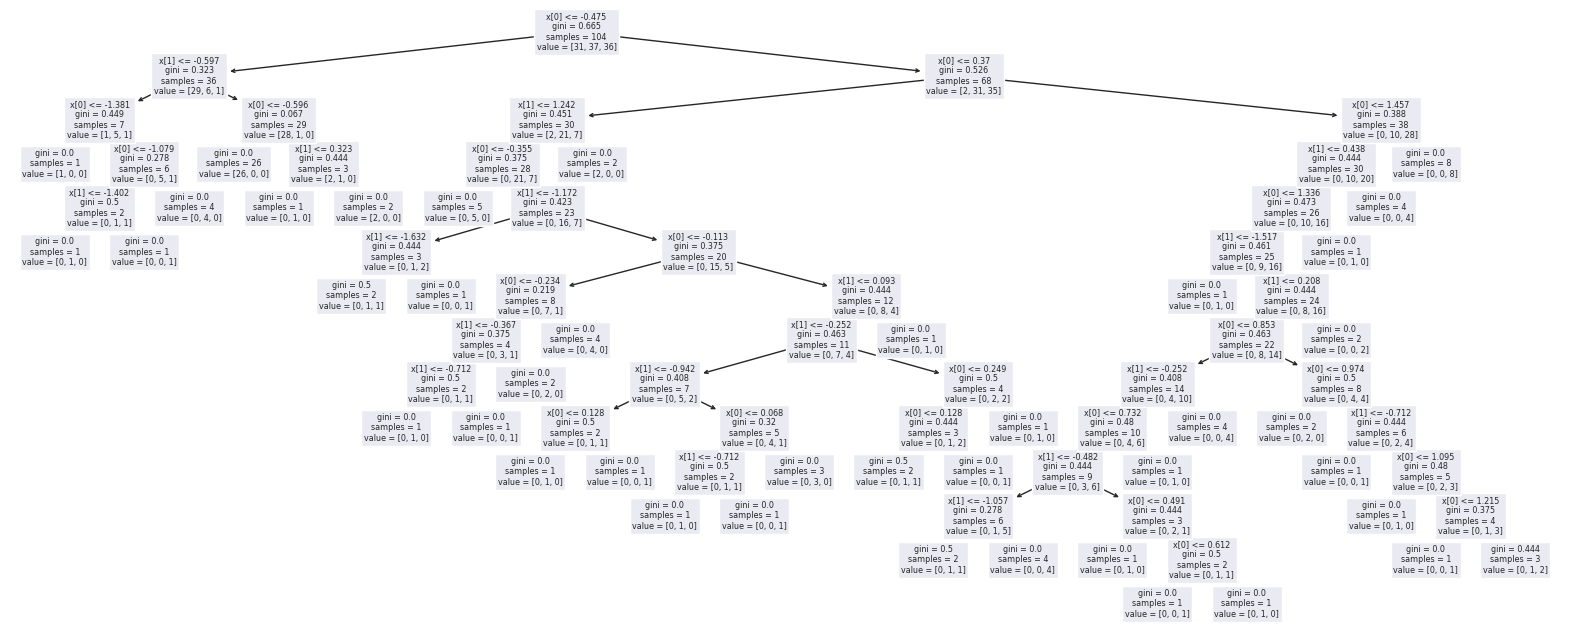

In [68]:
# Visualizando a árvore

fig, ax = plt.subplots(figsize=(20,8))

tree.plot_tree(clf2)

plt.show()

In [69]:
# Fazendo a previsão
y_pred2 = clf2.predict(X_test)

In [70]:
# Avaliando o modelo

confusion_matrix(y_test,y_pred2)

array([[18,  1,  0],
       [ 0,  9,  4],
       [ 0,  4,  9]])

### **KNN (Nearest Neighbors Classification)**

Classifica cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.

In [71]:
# Criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)

# Fazendo o fit com os dados de treino
clf = clf.fit(X_train,y_train)

# Fazendo a previsão para os dados de teste
y_pred = clf.predict(X_test)

In [72]:
# Verificando a matriz de confusão

confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  7,  6],
       [ 0,  3, 10]])

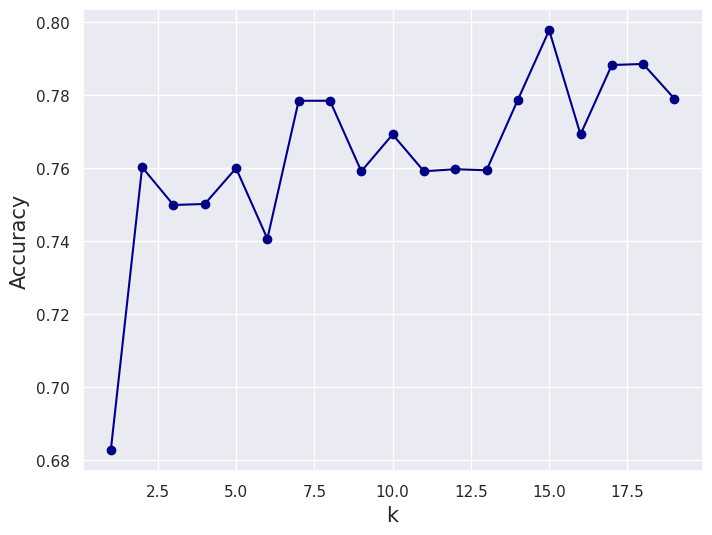

Melhor k: 15


In [73]:
nkf = 3 # number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    vscore.append(cv['test_score'].mean())
    vk.append(k)

plt.plot(vk, vscore, '-bo', color = '#000080')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.grid(True)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [74]:
#!pip install lazypredict

In [75]:
# ajusta o modelo k-vizinhos
k = 15
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(X_test)


# Calculando a acurácia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8


### **Naive Bayes**

O Naive Bayes também é conhecido como classificador probabilístico, pois é baseado no Teorema de Bayes.Assume-se que as características (features) de uma base de dados são independentes entre si e igualmente importantes para o resultado. O algoritmo calcula a probabilidade de cada classe e escolhe a classe com a maior probabilidade como a previsão.

In [76]:
# Definindo a função verossimilhança

def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        p = (1/np.sqrt(2*np.pi*sig))*np.exp((-1/2)*((x-mu)/sig)**2)
        return p
    lk = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])
        lk = lk*gaussian(y[j], m, s)
    return lk

In [77]:
# Estimação para cada classe

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data = pd.read_csv("/content/iris.csv", header=(0))

P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes)
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        priori = len(elements)/X_train.shape[0]
        P[classes[i]][j] = pj*priori

Número de linhas e colunas na matriz de atributos: (149, 5)


In [78]:
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

NaiveBayes = score

Accuracy: 0.8222222222222222


### **Support Vector Machine**

Algoritmo de aprendizado de maquina supervisionado, o objetivo do SVM é encontrar o melhor limite (ou hiperplano) que separa os dados em diferentes classes.

In [79]:
# Criando o classificador e já fazendo o fit com os dados
clf = SVC().fit(X_train,y_train)

In [80]:
# Fazendo a previsão
y_pred = clf.predict(X_test)

In [81]:
# E analisando a matriz de confusão
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  7,  6],
       [ 0,  2, 11]])

In [82]:
clf.score(X_test,y_test)

0.8222222222222222

### **Vários Modelos**

Utilizando a biblioteca LazyClassifier




In [85]:
from lazypredict.Supervised import LazyClassifier

# Função pronta
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 14%|█▍        | 4/29 [00:00<00:02, 11.34it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: 'virginica'
ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for BernoulliNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: 'versicolor'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for DummyClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: 'versicolor'


 41%|████▏     | 12/29 [00:00<00:01, 14.44it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for GaussianNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for KNeighborsClassifier
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for LabelPropagation
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for LabelSpreading
could not convert string to float: 'versicolor'


 55%|█████▌    | 16/29 [00:01<00:00, 16.20it/s]

ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for LinearSVC
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for LogisticRegression
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for NearestCentroid
could not convert string to float: 'versicolor'


 72%|███████▏  | 21/29 [00:01<00:00, 20.26it/s]

ROC AUC couldn't be calculated for NuSVC
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for Perceptron
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
could not convert string to float: 'versicolor'


 83%|████████▎ | 24/29 [00:01<00:00, 12.70it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: 'versicolor'
ROC AUC couldn't be calculated for RidgeClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for RidgeClassifierCV
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SGDClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SVC
could not convert string to float: 'versicolor'
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['setosa' 'versicolor' 'virginica']
[LightGBM] [Warning] 

100%|██████████| 29/29 [00:02<00:00, 13.60it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [84]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.84,0.82,None,0.84,0.08
KNeighborsClassifier,0.84,0.82,None,0.84,0.02
PassiveAggressiveClassifier,0.84,0.82,None,0.84,0.02
LogisticRegression,0.84,0.82,None,0.84,0.02
LinearSVC,0.82,0.79,None,0.81,0.04
SVC,0.82,0.79,None,0.82,0.02
GaussianNB,0.82,0.79,None,0.82,0.02
LabelPropagation,0.82,0.79,None,0.82,0.03
LabelSpreading,0.82,0.79,None,0.82,0.04


### **Conclusão**
O modelo de Machine learning que apresentou melhor desempenho foi a **árvore de decisão** com acurácia de 0.96, o classificador Naive Bayes e SVM obtiveram a mesma pontuação (0.82), o KNN obteve a menor pontuação (0.80). Todavia, ao utilizar o algoritmo **Decision tree** estamos sujeitos ao problema de overfitting.